In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import csv
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from random import seed
from random import randint

# MultiClass Classification

##50 Agree

In [ ]:
#load train e test
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_50Agree.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set.txt'
delimiter = ','

In [ ]:
#train / test split
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])


In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(4264, 4264, 1454, 1454)

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count, CountVectorizer 
                                  # converts a collection of text documents to a matrix of token counts

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((1454, 1847), (4264, 1847))

In [ ]:
# feature selection, SelectKBest selects features according to the k highest scores
sel = SelectKBest(chi2, k='all')  
sel.fit(X_train_tok,y_train)
X_train_sel = sel.transform(X_train_tok)
X_test_sel = sel.transform(X_test_tok)

In [ ]:
#NB uses a multinomial model based on term frequencies, we can skip the tfidf module.
%%time
nb_clf = MultinomialNB()
nb_clf.fit(X_train_sel, y_train)
y_pred = nb_clf.predict(X_test_sel)
print(accuracy_score(y_test,y_pred)*100)

72.21458046767538
CPU times: user 36.5 ms, sys: 6.47 ms, total: 43 ms
Wall time: 47.3 ms


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.51      0.60      0.55       179
     neutral       0.77      0.89      0.83       872
    positive       0.69      0.42      0.52       403

    accuracy                           0.72      1454
   macro avg       0.66      0.64      0.63      1454
weighted avg       0.72      0.72      0.71      1454



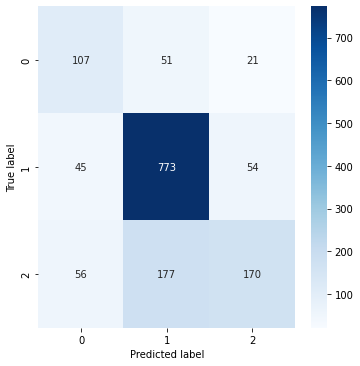

In [ ]:
cm = confusion_matrix(y_test, y_pred)
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_clf.predict(vect.transform([instance])))

diluted earnings per share eps rose eur 368 eur 050
Label: positive
Predicted Label:  ['positive']


In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_clf.predict(vect.transform([instance])))

addition yit reserved epi russia right expand logistics center 100000 m2
Label: neutral
Predicted Label:  ['neutral']


## 66 Agree



In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_66Agree.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set.txt'
delimiter = ','

In [ ]:
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])


In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(3723, 3723, 1454, 1454)

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((1454, 1688), (3723, 1688))

In [ ]:
sel = SelectKBest(chi2, k='all')  # feature selection
sel.fit(X_train_tok,y_train)
X_train_sel = sel.transform(X_train_tok)
X_test_sel = sel.transform(X_test_tok)

In [ ]:
#NB uses a multinomial model based on term frequencies, we can skip the tfidf module.
%%time
nb_clf = MultinomialNB()
nb_clf.fit(X_train_sel, y_train)
y_pred = nb_clf.predict(X_test_sel)
print(accuracy_score(y_test,y_pred)*100)

71.04539202200826
CPU times: user 30.5 ms, sys: 9.86 ms, total: 40.4 ms
Wall time: 41.9 ms


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.51      0.54      0.52       179
     neutral       0.76      0.88      0.82       872
    positive       0.65      0.42      0.51       403

    accuracy                           0.71      1454
   macro avg       0.64      0.61      0.62      1454
weighted avg       0.70      0.71      0.70      1454



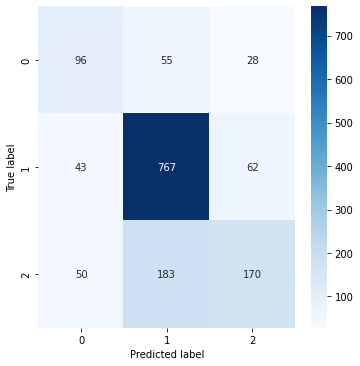

In [ ]:
cm = confusion_matrix(y_test, y_pred)
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_clf.predict(vect.transform([instance])))

rimi supermarket key customer magistral center
Label: neutral
Predicted Label:  ['neutral']


In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_clf.predict(vect.transform([instance])))

largest elevator market world chinese output elevator continued rise 262000 unit 2009 5 yronyr
Label: positive
Predicted Label:  ['neutral']


## 75 Agree


In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_75Agree.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set.txt'
delimiter = ','

In [ ]:
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])


In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(3061, 3061, 1454, 1454)

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((1454, 1407), (3061, 1407))

In [ ]:
sel = SelectKBest(chi2, k='all')  # feature selection
sel.fit(X_train_tok,y_train)
X_train_sel = sel.transform(X_train_tok)
X_test_sel = sel.transform(X_test_tok)

In [ ]:
%%time
nb_clf = MultinomialNB()
nb_clf.fit(X_train_sel, y_train)
y_pred = nb_clf.predict(X_test_sel)
print(accuracy_score(y_test,y_pred)*100)

70.56396148555709
CPU times: user 29.1 ms, sys: 3.83 ms, total: 32.9 ms
Wall time: 39.5 ms


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.51      0.47      0.49       179
     neutral       0.75      0.89      0.81       872
    positive       0.66      0.42      0.51       403

    accuracy                           0.71      1454
   macro avg       0.64      0.59      0.60      1454
weighted avg       0.70      0.71      0.69      1454



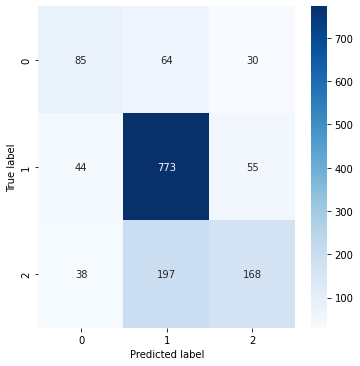

In [ ]:
cm = confusion_matrix(y_test, y_pred)
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_clf.predict(vect.transform([instance])))

sale finland decreased 105 january sale outside finland dropped 17
Label: negative
Predicted Label:  ['negative']


In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_clf.predict(vect.transform([instance])))

currently employ 750 people expects headcount reach 1000 end 2007
Label: positive
Predicted Label:  ['neutral']


## All Agree

In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_AllAgree.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set.txt'
delimiter = ','

In [ ]:
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])


In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(2008, 2008, 1454, 1454)

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((1454, 959), (2008, 959))

In [ ]:
sel = SelectKBest(chi2, k='all')  # feature selection
sel.fit(X_train_tok,y_train)
X_train_sel = sel.transform(X_train_tok)
X_test_sel = sel.transform(X_test_tok)

In [ ]:
%%time
nb_clf = MultinomialNB()
nb_clf.fit(X_train_sel, y_train)
y_pred = nb_clf.predict(X_test_sel)
print(accuracy_score(y_test,y_pred)*100)

70.01375515818432
CPU times: user 21.6 ms, sys: 4.72 ms, total: 26.3 ms
Wall time: 29 ms


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.60      0.42      0.49       179
     neutral       0.73      0.89      0.80       872
    positive       0.63      0.41      0.50       403

    accuracy                           0.70      1454
   macro avg       0.65      0.57      0.60      1454
weighted avg       0.69      0.70      0.68      1454



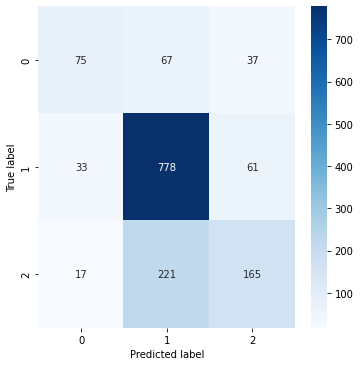

In [ ]:
cm = confusion_matrix(y_test, y_pred)
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_clf.predict(vect.transform([instance])))

tecnomen headquartered espoo finland develops messaging charging solution telecomms operator service provider worldwide
Label: neutral
Predicted Label:  ['neutral']


In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_clf.predict(vect.transform([instance])))

transaction support huhtamaki strategic review rigid plastic consumer good operation say huhtamñki oyj ceo jukka moisio
Label: neutral
Predicted Label:  ['neutral']


#Binary Classification

##50 Agree

In [ ]:
#load train e test
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_50Agree_binary.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set_binary.txt'
delimiter = ','

In [ ]:
#train / test split
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])


In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(1385, 1385, 582, 582)

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count, CountVectorizer 
                                  # converts a collection of text documents to a matrix of token counts
print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((582, 741), (1385, 741))

In [ ]:
# feature selection, SelectKBest selects features according to the k highest scores
bin_sel = SelectKBest(chi2, k='all')  
bin_sel.fit(X_train_tok,y_train)
X_train_sel_bin = bin_sel.transform(X_train_tok)
X_test_sel_bin = bin_sel.transform(X_test_tok)

In [ ]:
%%time
nb_bin = MultinomialNB() # nb with default parameters
nb_bin.fit(X_train_sel_bin, y_train)
y_pred = nb_bin.predict(X_test_sel_bin)
print(accuracy_score(y_test,y_pred)*100)

78.69415807560138
CPU times: user 12.4 ms, sys: 3.1 ms, total: 15.5 ms
Wall time: 22 ms


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.64      0.72      0.68       179
    positive       0.87      0.82      0.84       403

    accuracy                           0.79       582
   macro avg       0.75      0.77      0.76       582
weighted avg       0.80      0.79      0.79       582



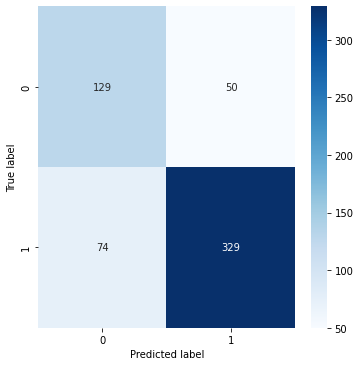

In [ ]:
cm = confusion_matrix(y_test, y_pred)
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_bin.predict(vect.transform([instance])))

group operating loss eur 08 mn profit eur 25 mn 2004
Label: negative
Predicted Label:  ['negative']


In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_bin.predict(vect.transform([instance])))

extension new contract eight engine plant produce 100 mw said
Label: positive
Predicted Label:  ['positive']


In [ ]:
%%time
nb_bin_pipeline = Pipeline([
    ('vect', CountVectorizer()),  # feature extraction
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('learner', MultinomialNB())  # learning algorithm
])

nb_bin_pipeline.fit(x_train,y_train)
bin_predictions = nb_bin_pipeline.predict(x_test)

print('Classification report:')
print(classification_report(y_test, bin_predictions))
cm = confusion_matrix(y_test, bin_predictions)

Classification report:
              precision    recall  f1-score   support

    negative       0.69      0.68      0.68       179
    positive       0.86      0.87      0.86       403

    accuracy                           0.81       582
   macro avg       0.77      0.77      0.77       582
weighted avg       0.81      0.81      0.81       582

CPU times: user 68.8 ms, sys: 421 µs, total: 69.2 ms
Wall time: 70.1 ms


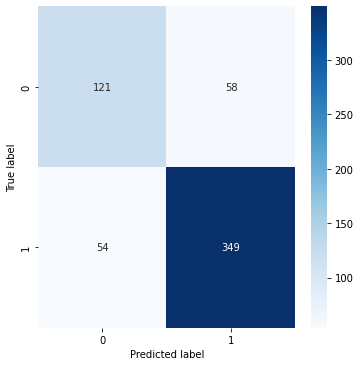

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_bin_pipeline.predict([instance]))

company said supply wcdma 3ghspa radio network including modular high capacity nokia flexi wcdma base station east java bali sumatra batam
Label: positive
Predicted Label:  ['positive']


In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_bin_pipeline.predict([instance]))

metso estimate need personnel reduction amount 25 people
Label: negative
Predicted Label:  ['negative']


In [ ]:
tokenizer = nb_bin_pipeline.named_steps['vect']
selector = nb_bin_pipeline.named_steps['sel']
classifier = nb_bin_pipeline.named_steps['learner']

In [ ]:
classifier.class_log_prior_,classifier.feature_log_prob_, len(classifier.feature_log_prob_[0])

(array([-1.18136625, -0.36652213]),
 array([[-9.26084335, -9.26084335, -8.56769617, ..., -8.56769617,
         -8.56769617, -9.26084335],
        [-8.70101362, -7.49704082, -9.10647873, ..., -9.79962591,
         -9.10647873, -9.10647873]]),
 4583)

In [ ]:
#In NB a key factor for decision is the ratio between the likelihood for positive and negative decision.
ratio = classifier.feature_log_prob_[0]/classifier.feature_log_prob_[1]

In [ ]:
feats_w_classifier_weight = list()
feature_names = tokenizer.get_feature_names()
for index,weight in enumerate(selector.inverse_transform([ratio])[0]):
    if weight!=0:
        feats_w_classifier_weight.append((weight,feature_names[index]))
feats_w_classifier_weight = sorted(feats_w_classifier_weight)
len(feats_w_classifier_weight)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


4583

In [ ]:
#most relevant features for a positive decision
feats_w_classifier_weight[-100::-1]

[(1.179167114331044, 'turned'),
 (1.179167114331044, 'talvivaara'),
 (1.179167114331044, 'sysopen'),
 (1.179167114331044, 'started'),
 (1.179167114331044, 'recommendation'),
 (1.179167114331044, 'partner'),
 (1.179167114331044, 'move'),
 (1.179167114331044, 'location'),
 (1.179167114331044, 'lithuanian'),
 (1.179167114331044, 'lithuania'),
 (1.179167114331044, 'launch'),
 (1.179167114331044, 'knowhow'),
 (1.179167114331044, 'infrastructure'),
 (1.179167114331044, 'fully'),
 (1.179167114331044, 'ensure'),
 (1.179167114331044, 'digital'),
 (1.179167114331044, 'cover'),
 (1.179167114331044, 'client'),
 (1.179167114331044, 'center'),
 (1.179167114331044, 'capability'),
 (1.179167114331044, 'base'),
 (1.179167114331044, 'average'),
 (1.179167114331044, 'asia'),
 (1.179167114331044, 'add'),
 (1.179167114331044, '04'),
 (1.171295283562907, 'security'),
 (1.171295283562907, 'petersburg'),
 (1.171295283562907, 'nordea'),
 (1.171295283562907, 'metal'),
 (1.171295283562907, 'chain'),
 (1.17129528

In [ ]:
#most relevant features for a negative decision
feats_w_classifier_weight[:100]

[(0.5765450121936598, 'fell'),
 (0.6194269513805044, 'decreased'),
 (0.6757182450963068, 'layoff'),
 (0.6914485067609621, 'scanfil'),
 (0.6943981230397863, 'lower'),
 (0.7100534574409725, 'warning'),
 (0.7208049408744406, 'temporarily'),
 (0.7328240767784051, 'laid'),
 (0.7328240767784051, 'lay'),
 (0.7352890390918543, 'personnel'),
 (0.7531068719075477, 'staff'),
 (0.7621805108918837, 'drop'),
 (0.7621805108918837, 'employment'),
 (0.7621805108918837, 'slipped'),
 (0.7640997651887385, 'declined'),
 (0.7640997651887385, 'fall'),
 (0.7640997651887385, 'issued'),
 (0.764953268491621, 'cut'),
 (0.775669606699758, 'dropped'),
 (0.775669606699758, 'temporary'),
 (0.780785461571894, 'jyvaskyla'),
 (0.780785461571894, 'lt'),
 (0.780785461571894, 'redundant'),
 (0.780785461571894, 'strike'),
 (0.7870587274137164, 'employee'),
 (0.7870587274137164, 'negotiation'),
 (0.7879072870845922, 'half'),
 (0.7887527106218368, 'worker'),
 (0.7958671253351253, 'job'),
 (0.8032669289650143, 'adpnews'),
 (0.

##66 Agree

In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_66Agree_binary.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set_binary.txt'
delimiter = ','

In [ ]:
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])


In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(1189, 1189, 582, 582)

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((582, 627), (1189, 627))

In [ ]:
# feature selection
bin_sel = SelectKBest(chi2, k='all')  
bin_sel.fit(X_train_tok,y_train)
X_train_sel_bin = bin_sel.transform(X_train_tok)
X_test_sel_bin = bin_sel.transform(X_test_tok)

In [ ]:
%%time
nb_bin = MultinomialNB() # nb with default parameters
nb_bin.fit(X_train_sel_bin, y_train)
y_pred = nb_bin.predict(X_test_sel_bin)
print(accuracy_score(y_test,y_pred)*100)

79.89690721649485
CPU times: user 10.7 ms, sys: 976 µs, total: 11.7 ms
Wall time: 12.3 ms


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.67      0.69      0.68       179
    positive       0.86      0.85      0.85       403

    accuracy                           0.80       582
   macro avg       0.76      0.77      0.77       582
weighted avg       0.80      0.80      0.80       582



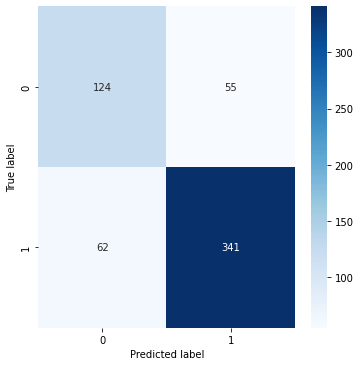

In [ ]:
cm = confusion_matrix(y_test, y_pred)
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_bin.predict(vect.transform([instance])))

company said supply wcdma 3ghspa radio network including modular high capacity nokia flexi wcdma base station east java bali sumatra batam
Label: positive
Predicted Label:  ['positive']


In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_bin.predict(vect.transform([instance])))

turnover rose eur21m eur17m
Label: positive
Predicted Label:  ['positive']


In [ ]:
%%time
nb_bin_pipeline = Pipeline([
    ('vect', CountVectorizer()),  # feature extraction
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('learner', MultinomialNB())  # learning algorithm
])

nb_bin_pipeline.fit(x_train,y_train)
bin_predictions = nb_bin_pipeline.predict(x_test)

print('Classification report:')
print(classification_report(y_test, bin_predictions))
cm = confusion_matrix(y_test, bin_predictions)


Classification report:
              precision    recall  f1-score   support

    negative       0.73      0.66      0.70       179
    positive       0.86      0.89      0.87       403

    accuracy                           0.82       582
   macro avg       0.79      0.78      0.78       582
weighted avg       0.82      0.82      0.82       582

CPU times: user 55 ms, sys: 441 µs, total: 55.5 ms
Wall time: 57.2 ms


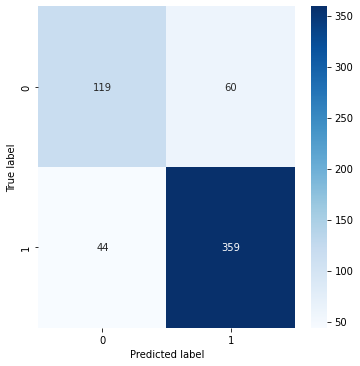

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_bin_pipeline.predict([instance]))

helsinki afx kci konecranes said order four hot metal ladle crane indian steel producer bhushan steel strip ltd
Label: positive
Predicted Label:  ['positive']


In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_bin_pipeline.predict([instance]))

uponor made operating profit eur 1510 mn eur 1437 mn made 2007 record year
Label: positive
Predicted Label:  ['negative']


In [ ]:
ratio = classifier.feature_log_prob_[0]/classifier.feature_log_prob_[1]

In [ ]:
feats_w_classifier_weight = list()
feature_names = tokenizer.get_feature_names()
for index,weight in enumerate(selector.inverse_transform([ratio])[0]):
    if weight!=0:
        feats_w_classifier_weight.append((weight,feature_names[index]))
feats_w_classifier_weight = sorted(feats_w_classifier_weight)
len(feats_w_classifier_weight)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


4583

In [ ]:
#most relevant features for a positive decision
feats_w_classifier_weight[-100::-1]

[(1.179167114331044, 'turned'),
 (1.179167114331044, 'talvivaara'),
 (1.179167114331044, 'sysopen'),
 (1.179167114331044, 'started'),
 (1.179167114331044, 'recommendation'),
 (1.179167114331044, 'partner'),
 (1.179167114331044, 'move'),
 (1.179167114331044, 'location'),
 (1.179167114331044, 'lithuanian'),
 (1.179167114331044, 'lithuania'),
 (1.179167114331044, 'launch'),
 (1.179167114331044, 'knowhow'),
 (1.179167114331044, 'infrastructure'),
 (1.179167114331044, 'fully'),
 (1.179167114331044, 'ensure'),
 (1.179167114331044, 'digital'),
 (1.179167114331044, 'cover'),
 (1.179167114331044, 'client'),
 (1.179167114331044, 'center'),
 (1.179167114331044, 'capability'),
 (1.179167114331044, 'base'),
 (1.179167114331044, 'average'),
 (1.179167114331044, 'asia'),
 (1.179167114331044, 'add'),
 (1.179167114331044, '04'),
 (1.171295283562907, 'security'),
 (1.171295283562907, 'petersburg'),
 (1.171295283562907, 'nordea'),
 (1.171295283562907, 'metal'),
 (1.171295283562907, 'chain'),
 (1.17129528

In [ ]:
#most relevant features for a negative decision
feats_w_classifier_weight[:100]

[(0.5765450121936598, 'fell'),
 (0.6194269513805044, 'decreased'),
 (0.6757182450963068, 'layoff'),
 (0.6914485067609621, 'scanfil'),
 (0.6943981230397863, 'lower'),
 (0.7100534574409725, 'warning'),
 (0.7208049408744406, 'temporarily'),
 (0.7328240767784051, 'laid'),
 (0.7328240767784051, 'lay'),
 (0.7352890390918543, 'personnel'),
 (0.7531068719075477, 'staff'),
 (0.7621805108918837, 'drop'),
 (0.7621805108918837, 'employment'),
 (0.7621805108918837, 'slipped'),
 (0.7640997651887385, 'declined'),
 (0.7640997651887385, 'fall'),
 (0.7640997651887385, 'issued'),
 (0.764953268491621, 'cut'),
 (0.775669606699758, 'dropped'),
 (0.775669606699758, 'temporary'),
 (0.780785461571894, 'jyvaskyla'),
 (0.780785461571894, 'lt'),
 (0.780785461571894, 'redundant'),
 (0.780785461571894, 'strike'),
 (0.7870587274137164, 'employee'),
 (0.7870587274137164, 'negotiation'),
 (0.7879072870845922, 'half'),
 (0.7887527106218368, 'worker'),
 (0.7958671253351253, 'job'),
 (0.8032669289650143, 'adpnews'),
 (0.

## 75 Agree

In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_75Agree_binary.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set_binary.txt'
delimiter = ','

In [ ]:
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])


In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(916, 916, 582, 582)

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((582, 477), (916, 477))

In [ ]:
# feature selection
bin_sel = SelectKBest(chi2, k='all')  
bin_sel.fit(X_train_tok,y_train)
X_train_sel_bin = bin_sel.transform(X_train_tok)
X_test_sel_bin = bin_sel.transform(X_test_tok)

In [ ]:
%%time
nb_bin = MultinomialNB()
nb_bin.fit(X_train_sel_bin, y_train)
y_pred = nb_bin.predict(X_test_sel_bin)
print(accuracy_score(y_test,y_pred)*100)

79.55326460481099
CPU times: user 10.9 ms, sys: 9.23 ms, total: 20.1 ms
Wall time: 18.7 ms


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.69      0.60      0.64       179
    positive       0.83      0.88      0.86       403

    accuracy                           0.80       582
   macro avg       0.76      0.74      0.75       582
weighted avg       0.79      0.80      0.79       582



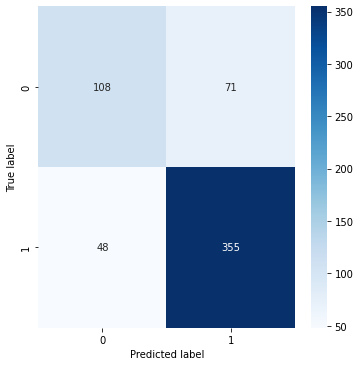

In [ ]:
cm = confusion_matrix(y_test, y_pred)
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_bin.predict(vect.transform([instance])))

finnish suominen corporation make wet wipe nonwovens flexible packaging starting employeremployee negotiation tampere plant finland lay 25 employee
Label: negative
Predicted Label:  ['negative']


In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_bin.predict(vect.transform([instance])))

solution used upgrading network russian mso 37 different city russia
Label: positive
Predicted Label:  ['positive']


In [ ]:
%%time
nb_bin_pipeline = Pipeline([
    ('vect', CountVectorizer()),  # feature extraction
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('learner', MultinomialNB())  # learning algorithm
])

nb_bin_pipeline.fit(x_train,y_train)
bin_predictions = nb_bin_pipeline.predict(x_test)

print('Classification report:')
print(classification_report(y_test, bin_predictions))
cm = confusion_matrix(y_test, bin_predictions)


Classification report:
              precision    recall  f1-score   support

    negative       0.70      0.63      0.66       179
    positive       0.84      0.88      0.86       403

    accuracy                           0.80       582
   macro avg       0.77      0.76      0.76       582
weighted avg       0.80      0.80      0.80       582

CPU times: user 48.1 ms, sys: 0 ns, total: 48.1 ms
Wall time: 52.1 ms


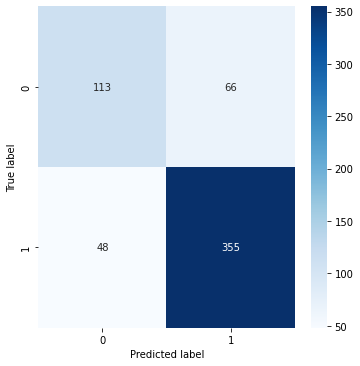

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_bin_pipeline.predict([instance]))

according seppñnen new technology umts900 solution network building cost onethird lower building 35 g network operating 2100 mhz frequency
Label: positive
Predicted Label:  ['positive']


In [ ]:
#sentiment prediction on random tweet

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_bin_pipeline.predict([instance]))

notified result company issuing 14432000 new share directed offering joint holding pequot decreased 110 963 total number share vote company
Label: negative
Predicted Label:  ['negative']


In [ ]:
ratio = classifier.feature_log_prob_[0]/classifier.feature_log_prob_[1]

In [ ]:
feats_w_classifier_weight = list()
feature_names = tokenizer.get_feature_names()
for index,weight in enumerate(selector.inverse_transform([ratio])[0]):
    if weight!=0:
        feats_w_classifier_weight.append((weight,feature_names[index]))
feats_w_classifier_weight = sorted(feats_w_classifier_weight)
len(feats_w_classifier_weight)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


4583

In [ ]:
#most relevant features for a positive decision
feats_w_classifier_weight[-100::-1]

[(1.179167114331044, 'turned'),
 (1.179167114331044, 'talvivaara'),
 (1.179167114331044, 'sysopen'),
 (1.179167114331044, 'started'),
 (1.179167114331044, 'recommendation'),
 (1.179167114331044, 'partner'),
 (1.179167114331044, 'move'),
 (1.179167114331044, 'location'),
 (1.179167114331044, 'lithuanian'),
 (1.179167114331044, 'lithuania'),
 (1.179167114331044, 'launch'),
 (1.179167114331044, 'knowhow'),
 (1.179167114331044, 'infrastructure'),
 (1.179167114331044, 'fully'),
 (1.179167114331044, 'ensure'),
 (1.179167114331044, 'digital'),
 (1.179167114331044, 'cover'),
 (1.179167114331044, 'client'),
 (1.179167114331044, 'center'),
 (1.179167114331044, 'capability'),
 (1.179167114331044, 'base'),
 (1.179167114331044, 'average'),
 (1.179167114331044, 'asia'),
 (1.179167114331044, 'add'),
 (1.179167114331044, '04'),
 (1.171295283562907, 'security'),
 (1.171295283562907, 'petersburg'),
 (1.171295283562907, 'nordea'),
 (1.171295283562907, 'metal'),
 (1.171295283562907, 'chain'),
 (1.17129528

In [ ]:
#most relevant features for a negative decision
feats_w_classifier_weight[:100]

[(0.5765450121936598, 'fell'),
 (0.6194269513805044, 'decreased'),
 (0.6757182450963068, 'layoff'),
 (0.6914485067609621, 'scanfil'),
 (0.6943981230397863, 'lower'),
 (0.7100534574409725, 'warning'),
 (0.7208049408744406, 'temporarily'),
 (0.7328240767784051, 'laid'),
 (0.7328240767784051, 'lay'),
 (0.7352890390918543, 'personnel'),
 (0.7531068719075477, 'staff'),
 (0.7621805108918837, 'drop'),
 (0.7621805108918837, 'employment'),
 (0.7621805108918837, 'slipped'),
 (0.7640997651887385, 'declined'),
 (0.7640997651887385, 'fall'),
 (0.7640997651887385, 'issued'),
 (0.764953268491621, 'cut'),
 (0.775669606699758, 'dropped'),
 (0.775669606699758, 'temporary'),
 (0.780785461571894, 'jyvaskyla'),
 (0.780785461571894, 'lt'),
 (0.780785461571894, 'redundant'),
 (0.780785461571894, 'strike'),
 (0.7870587274137164, 'employee'),
 (0.7870587274137164, 'negotiation'),
 (0.7879072870845922, 'half'),
 (0.7887527106218368, 'worker'),
 (0.7958671253351253, 'job'),
 (0.8032669289650143, 'adpnews'),
 (0.

## All Agree

In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_AllAgree_binary.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set_binary.txt'
delimiter = ','

In [ ]:
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])


In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((582, 298), (618, 298))

In [ ]:
# feature selection
bin_sel = SelectKBest(chi2, k='all')  
bin_sel.fit(X_train_tok,y_train)
X_train_sel_bin = bin_sel.transform(X_train_tok)
X_test_sel_bin = bin_sel.transform(X_test_tok)

In [ ]:
%%time
nb_bin = MultinomialNB()  # nb with default parameters
nb_bin_clf = nb_bin.fit(X_train_sel_bin,y_train)
y_pred = nb_bin_clf.predict(X_test_sel_bin)

CPU times: user 6.35 ms, sys: 3.55 ms, total: 9.9 ms
Wall time: 21.4 ms


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.72      0.53      0.61       179
    positive       0.81      0.91      0.86       403

    accuracy                           0.79       582
   macro avg       0.76      0.72      0.73       582
weighted avg       0.78      0.79      0.78       582



In [ ]:
cm = confusion_matrix(y_test, bin_predictions)

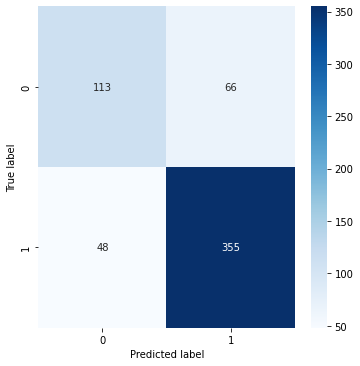

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_bin.predict(vect.transform([instance])))

finnish telecom software developer tecnomen oyj said december 5 2006 33 mln 25 mln euro order supply expansion charging messaging system mobile fixed network brasil telecom
Label: positive
Predicted Label:  ['positive']


In [ ]:
#sentiment prediction on random tweet

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_bin.predict(vect.transform([instance])))

bring cost saving eur 3mn year
Label: positive
Predicted Label:  ['positive']


In [ ]:
%%time
nb_bin_pipeline = Pipeline([
    ('vect', CountVectorizer()),  # feature extraction
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('learner', MultinomialNB())  # learning algorithm
])

nb_bin_pipeline.fit(x_train,y_train)
bin_predictions = nb_bin_pipeline.predict(x_test)

print('Classification report:')
print(classification_report(y_test, bin_predictions))
cm = confusion_matrix(y_test, bin_predictions)


Classification report:
              precision    recall  f1-score   support

    negative       0.71      0.54      0.61       179
    positive       0.82      0.90      0.86       403

    accuracy                           0.79       582
   macro avg       0.76      0.72      0.74       582
weighted avg       0.78      0.79      0.78       582

CPU times: user 46.9 ms, sys: 0 ns, total: 46.9 ms
Wall time: 47.3 ms


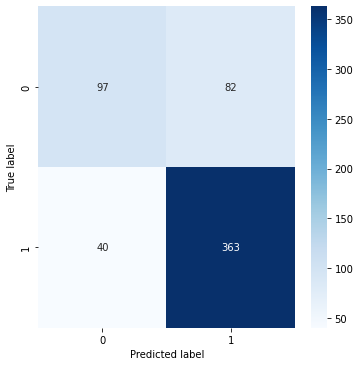

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_bin_pipeline.predict([instance]))


helsinki afx metso said upgrade one upmkymmene four paper machine latter mill jaemsaenkoski new coating color supply system machine process control quality measurement
Label: positive
Predicted Label:  ['positive']


In [ ]:
#sentiment prediction on random tweet

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",nb_bin_pipeline.predict([instance]))

sale volume cocacola market share decreased 22 242
Label: negative
Predicted Label:  ['negative']


In [ ]:

ratio = classifier.feature_log_prob_[0]/classifier.feature_log_prob_[1]

In [ ]:
feats_w_classifier_weight = list()
feature_names = tokenizer.get_feature_names()
for index,weight in enumerate(selector.inverse_transform([ratio])[0]):
    if weight!=0:
        feats_w_classifier_weight.append((weight,feature_names[index]))
feats_w_classifier_weight = sorted(feats_w_classifier_weight)
len(feats_w_classifier_weight)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


4583

In [ ]:
#most relevant features for a positive decision
feats_w_classifier_weight[-100::-1]

[(1.179167114331044, 'turned'),
 (1.179167114331044, 'talvivaara'),
 (1.179167114331044, 'sysopen'),
 (1.179167114331044, 'started'),
 (1.179167114331044, 'recommendation'),
 (1.179167114331044, 'partner'),
 (1.179167114331044, 'move'),
 (1.179167114331044, 'location'),
 (1.179167114331044, 'lithuanian'),
 (1.179167114331044, 'lithuania'),
 (1.179167114331044, 'launch'),
 (1.179167114331044, 'knowhow'),
 (1.179167114331044, 'infrastructure'),
 (1.179167114331044, 'fully'),
 (1.179167114331044, 'ensure'),
 (1.179167114331044, 'digital'),
 (1.179167114331044, 'cover'),
 (1.179167114331044, 'client'),
 (1.179167114331044, 'center'),
 (1.179167114331044, 'capability'),
 (1.179167114331044, 'base'),
 (1.179167114331044, 'average'),
 (1.179167114331044, 'asia'),
 (1.179167114331044, 'add'),
 (1.179167114331044, '04'),
 (1.171295283562907, 'security'),
 (1.171295283562907, 'petersburg'),
 (1.171295283562907, 'nordea'),
 (1.171295283562907, 'metal'),
 (1.171295283562907, 'chain'),
 (1.17129528

In [ ]:
#most relevant features for a negative decision
feats_w_classifier_weight[:100]

[(0.5765450121936598, 'fell'),
 (0.6194269513805044, 'decreased'),
 (0.6757182450963068, 'layoff'),
 (0.6914485067609621, 'scanfil'),
 (0.6943981230397863, 'lower'),
 (0.7100534574409725, 'warning'),
 (0.7208049408744406, 'temporarily'),
 (0.7328240767784051, 'laid'),
 (0.7328240767784051, 'lay'),
 (0.7352890390918543, 'personnel'),
 (0.7531068719075477, 'staff'),
 (0.7621805108918837, 'drop'),
 (0.7621805108918837, 'employment'),
 (0.7621805108918837, 'slipped'),
 (0.7640997651887385, 'declined'),
 (0.7640997651887385, 'fall'),
 (0.7640997651887385, 'issued'),
 (0.764953268491621, 'cut'),
 (0.775669606699758, 'dropped'),
 (0.775669606699758, 'temporary'),
 (0.780785461571894, 'jyvaskyla'),
 (0.780785461571894, 'lt'),
 (0.780785461571894, 'redundant'),
 (0.780785461571894, 'strike'),
 (0.7870587274137164, 'employee'),
 (0.7870587274137164, 'negotiation'),
 (0.7879072870845922, 'half'),
 (0.7887527106218368, 'worker'),
 (0.7958671253351253, 'job'),
 (0.8032669289650143, 'adpnews'),
 (0.